Part 1: Markov chains

Markov chains are crucial to Markov Chain Monte Carlo (as you would expect). So, we'll spend a few minutes here practicing with them and looking at a few properties.

As noted in the lecture, the state of a Markov chain is dependent on only its most recent previous state. This is made clear by this factorization:

$$P(x_t|x_{t-1}, x_{t-2}, ..., x_{0}) = P(x_t | x_{t-1})$$

This is known as the "memorylessness" property.

Additionally, for use in MCMC, our Markov chains need to have the ergodic property. In other words, they must be irreducible, time-homogenous, aperiodic, and have a stationary distribution.

(Irreducible: Every state is reachable from every other state.)

(Time-homogenous: The transition matrix does not depend on the sampling time step.)

(Aperiodic: There are (generally) no constraints on path length between states.)

The Markov chain transition matrix must also be a "stochastic matrix": all values are nonnegative, and every row sums to one.

1) Implement a predicate function to determine if a given matrix is a stochastic matrix. You may assume the input is a 2-dimensional square `numpy` array.

In [2]:
import numpy as np

In [58]:
def stochastic_matrix(matrix):
    """Test if a 2d numpy square to see is it is stochastic"""
    rows = len(matrix)
    row_sums = matrix.sum(axis=1)
    non_negative = (matrix<0).sum()
    if non_negative>0:
        return False
    equal_one = sum(row_sums!=1)
    if equal_one != 0:
        return False
    return True

In [64]:
t = np.array([[0,1.0],
             [.8,.2]])
f = np.array([[-.10,1.0],
             [.8,.2]])
rand = np.random.rand(3,3)

In [65]:
rand

array([[ 0.82321877,  0.44485942,  0.07068085],
       [ 0.87150805,  0.74780502,  0.85406448],
       [ 0.0112646 ,  0.26523912,  0.86184398]])

In [66]:
assert stochastic_matrix(t) == True
assert stochastic_matrix(f) == False
assert stochastic_matrix(rand) == False

2) Given a finite square transition matrix, how could you verify that it is irreducible? Think algorithmically. (Note that I am asking for a plain-English explanation. If you wish, you can implement a function for this but it is not required.)

 - Use the properties of the stochastic matrix but also impose the constraint that no row can only have one entry as a one and everying else as a zero

3) Implement a function that computes one step of a Markov chain. It should take as input a sample vector and a transition matrix, and return a new probability vector. You may assume the inputs are semantically valid for the Markov chain (i.e. that the sample vector sums to one, and that the transition matrix is ergodic).

You can begin with this boilerplate:

```python
def step_markov_chain(sample, transition_matrix):
    # do work
    return new_sample
```

In [67]:
def step_markov_chain(sample, transition_matrix):
    new_sample = sample @ transition_matrix
    return new_sample

In [68]:
s = np.array([.2,.8])
transition = np.array([[.2,.8],
                      [.7,.3]])

In [70]:
step_markov_chain(s,transition)

array([ 0.6,  0.4])

4) Use your function to find the stationary distribution of the following transition matrix T.

Remember that the initial sample (the guess) must be a valid probability assignment (sum to 1).

In [73]:
import numpy as np

T = np.array([[0.2, 0.8], [0.1, 0.9]])

x = np.array([.8,.2])
print(x)
for i in range(10):
    x = step_markov_chain(x, T)
    print(x)

[ 0.8  0.2]
[ 0.18  0.82]
[ 0.118  0.882]
[ 0.1118  0.8882]
[ 0.11118  0.88882]
[ 0.111118  0.888882]
[ 0.1111118  0.8888882]
[ 0.11111118  0.88888882]
[ 0.11111112  0.88888888]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]


5) In your own words, describe what the stationary distribution is.

- The stationary distribution shows that you have an 11%  chance of being in state one and an 88% chance of being in state two

6) Experiment with three different starting guesses for the first sample.

In [75]:
import numpy as np

T = np.array([[0.2, 0.8], [0.1, 0.9]])

x = np.array([.9,.1])
print(x)
for i in range(10):
    x = step_markov_chain(x, T)
    print(x)

[ 0.9  0.1]
[ 0.19  0.81]
[ 0.119  0.881]
[ 0.1119  0.8881]
[ 0.11119  0.88881]
[ 0.111119  0.888881]
[ 0.1111119  0.8888881]
[ 0.11111119  0.88888881]
[ 0.11111112  0.88888888]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]


In [76]:
import numpy as np

T = np.array([[0.2, 0.8], [0.1, 0.9]])

x = np.array([.1,.9])
print(x)
for i in range(10):
    x = step_markov_chain(x, T)
    print(x)

[ 0.1  0.9]
[ 0.11  0.89]
[ 0.111  0.889]
[ 0.1111  0.8889]
[ 0.11111  0.88889]
[ 0.111111  0.888889]
[ 0.1111111  0.8888889]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]


In [77]:
import numpy as np

T = np.array([[0.2, 0.8], [0.1, 0.9]])

x = np.array([.5,.5])
print(x)
for i in range(10):
    x = step_markov_chain(x, T)
    print(x)

[ 0.5  0.5]
[ 0.15  0.85]
[ 0.115  0.885]
[ 0.1115  0.8885]
[ 0.11115  0.88885]
[ 0.111115  0.888885]
[ 0.1111115  0.8888885]
[ 0.11111115  0.88888885]
[ 0.11111112  0.88888889]
[ 0.11111111  0.88888889]
[ 0.11111111  0.88888889]


In [158]:
yes = np.array([[.6,.4],
               [.7,.3]])

In [165]:
import numpy as np



x = np.array([.5,.5])
print(x)
for i in range(10):
    x = step_markov_chain(x, yes)
    print(x)

[ 0.5  0.5]
[ 0.65  0.35]
[ 0.635  0.365]
[ 0.6365  0.3635]
[ 0.63635  0.36365]
[ 0.636365  0.363635]
[ 0.6363635  0.3636365]
[ 0.63636365  0.36363635]
[ 0.63636363  0.36363636]
[ 0.63636364  0.36363636]
[ 0.63636364  0.36363636]


In [160]:
np.linalg.eig(yes)

(array([ 1. , -0.1]), array([[ 0.70710678, -0.49613894],
        [ 0.70710678,  0.86824314]]))

In [164]:
0.49613894/(0.49613894+0.86824314), 0.86824314/(0.49613894+0.86824314) # confirm the convergence

(0.36363636496896823, 0.6363636350310318)

7) Why is the first sample important?

- The first sample is important because with a bad starting point it can take a couple of transitions before you find a distribution that better  reflects the long run distribution

8) Create three different transition matrices and find their stationary distributions. You may need to experiment with your matrices to make sure that the stationary distribution exists. In your own words, explain why your transition matrices are irreducible.

In [78]:
one = np.array([[.1,.2,.7],
               [.8,.1,.1],
               [.5,.3,.2]])

In [82]:


x = np.array([.5,.2,.3])
print(x)
for i in range(10):
    x = step_markov_chain(x, one)
    print(x)

[ 0.5  0.2  0.3]
[ 0.36  0.21  0.43]
[ 0.419  0.222  0.359]
[ 0.399   0.2137  0.3873]
[ 0.40451  0.21736  0.37813]
[ 0.403404  0.216077  0.380519]
[ 0.4034615  0.2164442  0.3800943]
[ 0.40354866  0.21636501  0.38008633]
[ 0.40349004  0.21637213  0.38013783]
[ 0.40351562  0.21637657  0.38010781]
[ 0.40350672  0.21637312  0.38012016]


In [88]:
two = np.array([[.25,0,.75],
               [.4,.2,.4],
               [.5,.4,.1]])

In [89]:


x = np.array([.5,.2,.3])
print(x)
for i in range(10):
    x = step_markov_chain(x, two)
    print(x)

[ 0.5  0.2  0.3]
[ 0.355  0.16   0.485]
[ 0.39525  0.226    0.37875]
[ 0.3785875  0.1967     0.4247125]
[ 0.38568313  0.209225    0.40509187]
[ 0.38265672  0.20388175  0.41346153]
[ 0.38394765  0.20616096  0.40989139]
[ 0.38339699  0.20518875  0.41141426]
[ 0.38363188  0.20560345  0.41076467]
[ 0.38353169  0.20542656  0.41104176]
[ 0.38357442  0.20550201  0.41092356]


In [92]:
three = np.array([[.5,.2,.4],
               [.4,.2,.4],
               [.7,.2,.1]])

In [93]:


x = np.array([.5,.2,.3])
print(x)
for i in range(10):
    x = step_markov_chain(x, three)
    print(x)

[ 0.5  0.2  0.3]
[ 0.54  0.2   0.31]
[ 0.567  0.21   0.327]
[ 0.5964  0.2208  0.3435]
[ 0.62697  0.23214  0.36123]
[ 0.659202  0.244068  0.379767]
[ 0.6930651  0.2566074  0.3992847]
[ 0.7286748   0.26979144  0.41979747]
[ 0.76611221  0.28365274  0.44136624]
[ 0.80547357  0.29822624  0.4640426 ]
[ 0.8468571   0.31354848  0.48788418]


Part 2: Markov Chain Monte Carlo

In [94]:
# Preliminaries

%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(42)

Let's implement a Metropolis MCMC sampler, then compare it to one in a standard statistical library.

First, we generate some data: 100 points from a normal distribution with mean 1:

In [95]:
data = np.random.normal(loc=1, size=100)

We can plot a histogram of those points:

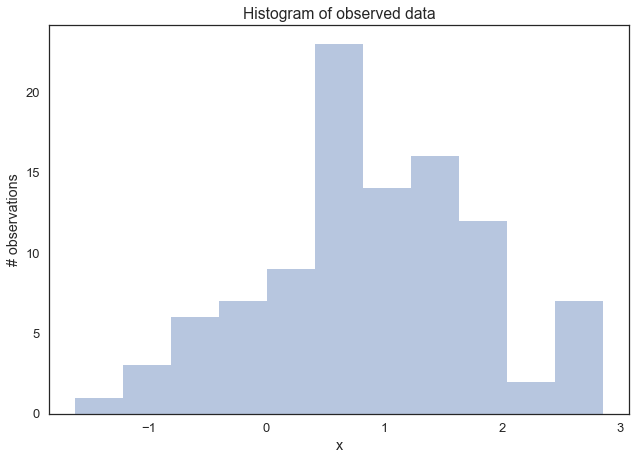

In [96]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

We need to choose a model. We already know the data generating process is a normal distribution with mean 1 and variance 0. For the sake of argument, we will try to infer the mean.

Because we are inferring the mean, the posterior distribution of our model will be our estimate for $\mu$:

$$\mu \sim \mathcal{N}(0, 1)$$

$$x | \mu \sim \mathcal{N}(x; \mu, 1)$$

In words, this says:

The mean has a prior distribution of $\mathcal{N}(0, 1)$ (which we chose arbitrarily).

The data, conditioned on the (unknown) mean, is distributed according to a normal distribution (which is parameterized by the data, the unknown mean, and a $\sigma$ of 1).


We will now build a Metropolis sampler for inferring one unknown parameter.

Recall the general MCMC algorithm:
0. Begin with an initial point.
1. Create a new proposal point to "jump" to.
2. Evaluate its likelihood and create an acceptance ratio.
3. Accept the proposal according to that acceptance ratio.
5. Goto 2.

Fill in the following code.

In [187]:
from math import e

In [249]:
# make_p is a utility function for making a version of our model with the proposed mu.
# using this separates the model from the sampler.
def make_p(mu):
    return norm(mu, 1)

def metropolis_sampler(initial_point, data, p_maker, n_samples, prior, proposal_stddev):
    """Return the posterior samples from the log probability"""
    posterior = [initial_point]
    
    # the result of p_maker should support the 'pdf' function
    
    n_dims = len(initial_point) # the number of dimensions
    current = initial_point
    
    for i in range(n_samples):
        # Metropolis creates proposals from a normal distribution:
        proposal = norm.rvs(current, proposal_stddev, n_dims)
        
        # Compute likelihood by multiplying probabilities of each point:
        likelihood_current = np.log(p_maker(current).pdf(data)).sum()

        #print(likelihood_current,'like current')
        likelihood_proposal = np.log(p_maker(proposal).pdf(data)).sum() # DO THIS
        
        # Compute the prior probability of current and proposed value:
        prior_current = prior.pdf(current)
        prior_proposal = prior.pdf(proposal) # DO THIS
        
        # posterior 
        p_current = likelihood_current + np.log( prior_current)
        p_proposal = likelihood_proposal + np.log(prior_proposal) # DO THIS
        
        # Accept proposal?
        p_accept =   p_proposal- p_current # DO THIS
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept =np.log(np.random.rand()) < p_accept
        
        if accept:
            # Update position
            current = proposal
            
    
        posterior.append(current)
    return posterior
            

Use it to compute the expectation of $\mu$ in this model with 1.1 as an initial guess:

```python
metropolis_sampler([1.1], data, make_p, 100, norm(), 1)
```

In [247]:
metropolis_sampler([1.1], data, make_p, 100, norm(), 1)

[-136.32157172] [-147.21038503]
[-136.32157172] [-134.05136839]
[-134.05136839] [-183.54369134]
[-134.05136839] [-179.1947332]
[-134.05136839] [-151.2392701]
[-134.05136839] [-134.80136495]
[-134.80136495] [-175.36847266]
[-134.80136495] [-138.59727456]
[-134.80136495] [-203.64415846]
[-134.80136495] [-242.0167528]
[-134.80136495] [-149.33359042]
[-134.80136495] [-141.97771717]
[-134.80136495] [-250.72825627]
[-134.80136495] [-134.05032692]
[-134.05032692] [-164.80070432]
[-134.05032692] [-163.21675986]
[-134.05032692] [-142.57189149]
[-134.05032692] [-195.61714768]
[-134.05032692] [-134.54618222]
[-134.54618222] [-140.88421245]
[-134.54618222] [-181.28643616]
[-134.54618222] [-174.93963411]
[-134.54618222] [-136.62274472]
[-134.54618222] [-142.00490043]
[-134.54618222] [-267.53913233]
[-134.54618222] [-147.09360102]
[-134.54618222] [-153.32713512]
[-134.54618222] [-147.1248912]
[-134.54618222] [-216.63121739]
[-134.54618222] [-198.45485471]
[-134.54618222] [-135.35256756]
[-134.546182

[[1.1],
 [1.1],
 array([ 0.87010542]),
 array([ 0.87010542]),
 array([ 0.87010542]),
 array([ 0.87010542]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 1.01035141]),
 array([ 0.90384468]),
 array([ 0.90384468]),
 array([ 0.90384468]),
 array([ 0.90384468]),
 array([ 0.90384468]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.98774601]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.97498307]),
 array([ 0.80541258]),
 array([ 0.8054125

Use the points 2, -1, 0, 1, 2 as initial guesses and compute the expected means.

In [230]:
metropolis_sampler([2.0], data, make_p, 100, norm(), 1)

[[2.0],
 array([ 1.86960003]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 0.62441137]),
 array([ 1.1690325]),
 array([ 1.1690325]),
 array([ 1.1690325]),
 array([ 0.88483421]),
 array([ 0.94350962]),
 array([ 0.94350962]),
 array([ 0.94350962]),
 array([ 1.08115264]),
 array([ 1.08115264]),
 array([ 1.08115264]),
 array([ 1.08115264]),
 array([ 1.08115264]),
 array([ 1.05547042]),
 array([ 0.77817346]),
 array([ 0.77817346]),
 array([ 0.77817346]),
 array([ 0.77817346]),
 array([ 0.77817346]),
 array([ 0.89946745]),
 array([ 0.89946745]),
 array([ 0.89946745]),
 array([ 0.89946745]),
 array([ 0.9318361]),
 array([ 0.9318361]),
 array([ 0.9318361]),
 array([ 0.9318361]),
 array([ 0.9318361]),
 array([ 1.01592956]),
 array([ 1.01592956]),
 array([ 0.83238773]),
 array([ 0.83238773]),
 array([ 0.83238773]),
 array([ 0.83238773]),
 array([ 0.83238773]),
 array([ 0.

In [231]:
metropolis_sampler([-1], data, make_p, 100, norm(), 1)

[[-1],
 array([-0.55113462]),
 array([-0.55113462]),
 array([-0.55113462]),
 array([ 1.03799658]),
 array([ 0.87666823]),
 array([ 0.89735082]),
 array([ 0.89735082]),
 array([ 0.89735082]),
 array([ 0.89735082]),
 array([ 0.9260864]),
 array([ 0.9260864]),
 array([ 0.85274209]),
 array([ 0.99794866]),
 array([ 0.92830594]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.7750443]),
 array([ 0.94802144]),
 array([ 0.94802144]),
 array([ 0.94802144]),
 array([ 0.94802144]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.83222439]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 0.95597548]),
 array([ 1.11934049]),
 array([ 1.11934049]),
 array([ 1.11

In [232]:
metropolis_sampler([0], data, make_p, 100, norm(), 1)

[[0],
 array([ 0.28587106]),
 array([ 0.28587106]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.89169228]),
 array([ 0.91323392]),
 array([ 0.9977758]),
 array([ 0.9977758]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.84247337]),
 array([ 0.82146601]),
 array([ 0.82146601]),
 array([ 0.82146601]),
 array([ 0.82146601]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.8552941]),
 array([ 0.855294

In [233]:
metropolis_sampler([1], data, make_p, 100, norm(), 1)

[[1],
 [1],
 [1],
 [1],
 array([ 0.91067219]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0.84161017]),
 array([ 0

Experiment with different numbers of samples. Conjecture a relationship between the initial guess and the convergence rate.



In [234]:
metropolis_sampler([2], data, make_p, 200, norm(), 1)

[[2],
 array([ 1.38113671]),
 array([ 1.38113671]),
 array([ 0.45078919]),
 array([ 0.45078919]),
 array([ 0.45078919]),
 array([ 0.45078919]),
 array([ 0.97164943]),
 array([ 0.97164943]),
 array([ 0.68495904]),
 array([ 0.68495904]),
 array([ 0.68495904]),
 array([ 0.69270923]),
 array([ 0.69270923]),
 array([ 0.8748096]),
 array([ 0.8748096]),
 array([ 0.8748096]),
 array([ 1.0188112]),
 array([ 1.0188112]),
 array([ 1.0188112]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.81596879]),
 array([ 0.82527158]),
 array([ 0.75657378]),
 array([ 0.75657378]),
 array([ 0.75657378]),
 array([ 0.75657378]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.77584002]),
 array([ 0.

In [235]:
metropolis_sampler([2], data, make_p, 300, norm(), 1)

[[2],
 [2],
 array([ 1.72023623]),
 array([ 1.72023623]),
 array([ 1.72023623]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.93277206]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),
 array([ 0.84783508]),

- With a bad starting guess, it will take longer and longer to converge

Try to find an initial guess that does not seem to converge after 1000 samples. (Note that you may have to avoid values that are too extreme, due to numerical overflow issues. [If you wish, you can update the sampler to operate in log-probability space to fix this.])

In [278]:
samples = metropolis_sampler([-35], data, make_p, 1000, norm(), .05)

In [282]:
np.mean(data)

0.89615348260590622

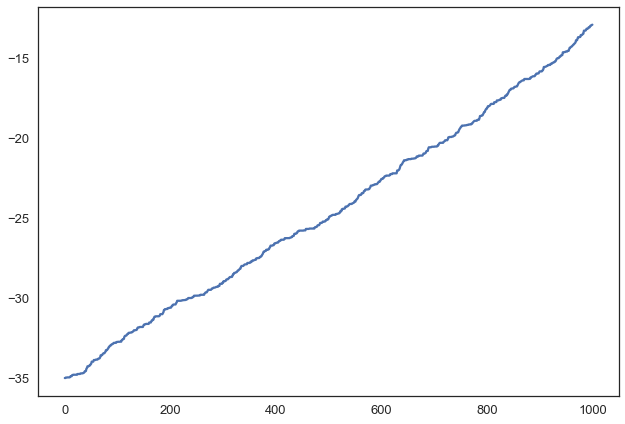

In [280]:
plt.plot(samples)

- If you change the standard devaition, it might not converge after 1000 steps. This is because you do not reach the correct point even though you are moving in the correct direction. Each step you take is small because the standard deviation is small

Experiment with different proposal standard deviation values. Conjecture a relationship between the stddev and the convergence rate.


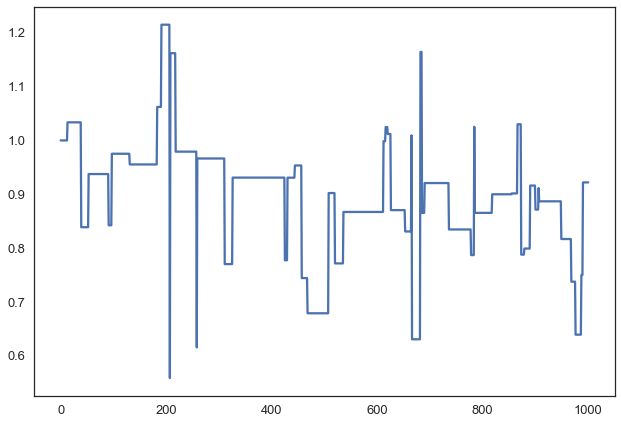

In [237]:
plt.plot(metropolis_sampler([1], data, make_p, 1000, norm(), 2));

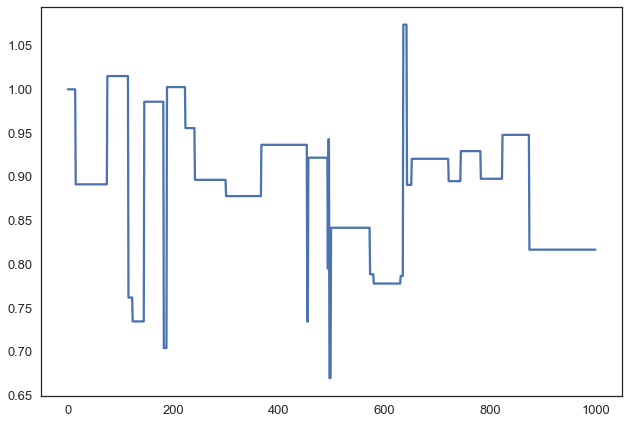

In [238]:
plt.plot(metropolis_sampler([1], data, make_p, 1000, norm(), 5));

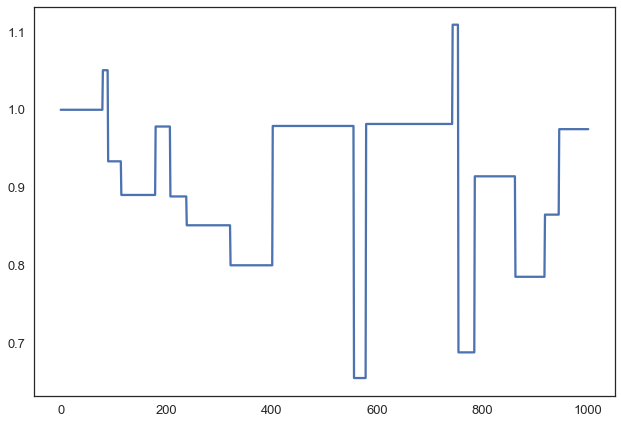

In [239]:
plt.plot(metropolis_sampler([1], data, make_p, 1000, norm(), 10));

- As the stddev increases, it takes longer (more samples) to converge to the true parameter

Now we'll create a plot of our traces. This plot shows the value of each sample.

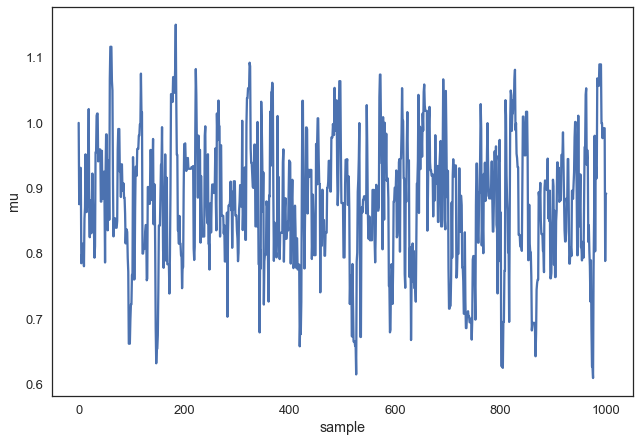

In [257]:
traces = metropolis_sampler([1.0], data, make_p, 1000, norm(), 0.1)
fig, ax = plt.subplots()
ax.plot([a[0] for a in traces])
_ = ax.set(xlabel='sample', ylabel='mu');

Plot traces of three other initial guesses and three other proposal standard deviations. Give explanations for why the plots look the way they do.

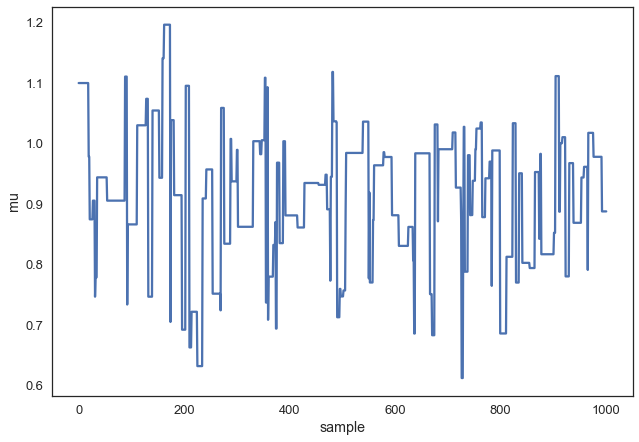

In [255]:
traces = metropolis_sampler([1.1], data, make_p, 1000, norm(), 1.0)
fig, ax = plt.subplots()
ax.plot([a[0] for a in traces])
_ = ax.set(xlabel='sample', ylabel='mu');

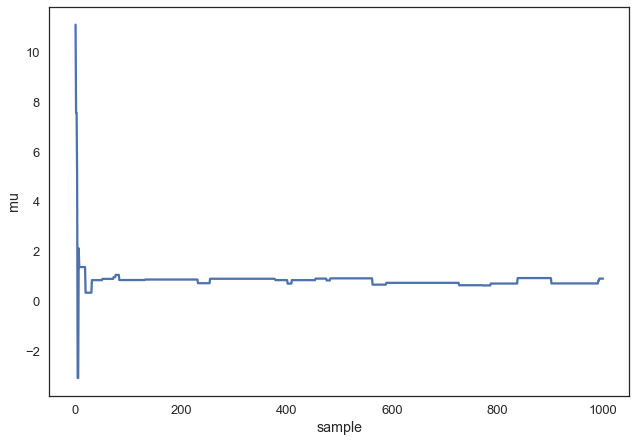

In [253]:
traces = metropolis_sampler([11.1], data, make_p, 1000, norm(), 5.0)
fig, ax = plt.subplots()
ax.plot([a[0] for a in traces])
_ = ax.set(xlabel='sample', ylabel='mu');

- With a larger standard deviation, your posterior makes larger 'jumps' to other points in your graph

"Burn-in" is a term for the initial samples that we want to discard. Why would we want to discard them? Can you think of a way to determine when we should stop the burn-in process?

- "Burn in" is a term used to describe the first X number of samples from MCMC. These samples are generally not representative of the true parameter of interest because they may lay far away from the areas of highest probability from your function. 
- You can look at the trace of the MCMC to see that it resembles while noise (i.e. no autocorrelation)
- You could also look at the change of the value from the posterior and see that it is either increasing or decreasing about 50% of the time for each

To wrap up, let's use PyMC3 to compare to our handwritten sampler.

100%|██████████| 15000/15000 [00:02<00:00, 7319.01it/s]


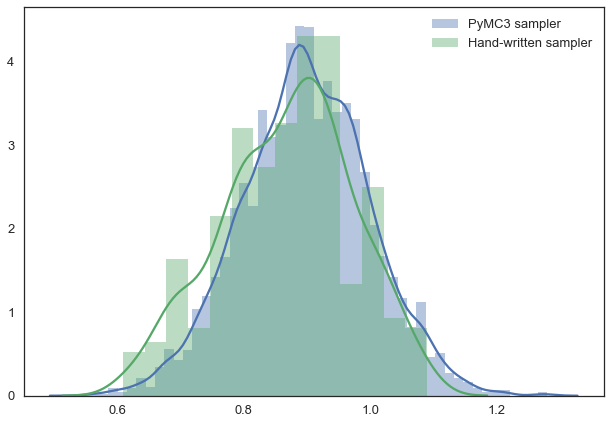

In [258]:
import pymc3 as pm

with pm.Model():
    mu = pm.Normal('mu', 1, 1)
    sigma = 1.
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
    
    step = pm.Metropolis()
    pymc3_traces = pm.sample(15000, step)
    
assert len(traces) > 1000, 'run the sampler with high n_samples'

sns.distplot(pymc3_traces[2000:]['mu'], label='PyMC3 sampler');
sns.distplot(traces[500:], label='Hand-written sampler');
plt.legend();

Verify through the above that our sampler matches that of PyMC3's Metropolis sampler.